<a href="https://colab.research.google.com/github/joohoshin/Python_Basic/blob/master/21_1_%EA%B8%B0%EB%A7%90%ED%8F%89%EA%B0%801.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 서울시 출산율 데이터셋

http://data.seoul.go.kr/dataList/10104/S/2/datasetView.do

In [ ]:
import pandas as pd
raw = pd.read_csv('/content/drive/My Drive/Python_202002/서울시출산률.txt',sep='\t')

In [ ]:
raw

,기간,자치구,합계출산율,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).1,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).2,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).3,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).4,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).5,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).6
0,기간,자치구,합계출산율,15-19세,20-24세,25-29세,30-34세,35-39세,40-44세,45-49세
1,1997,서울특별시,1.338,1.7,34.4,136.7,77.7,16.6,2.3,0.2
2,1998,서울특별시,1.272,1.5,30.1,129.4,77.3,16.2,2.2,0.2
3,1999,서울특별시,1.218,1.4,26.3,121.7,77.4,16.2,2.4,0.2
4,2000,서울특별시,1.275,1.3,23.5,121.4,90.2,18.8,2.6,0.2
...,...,...,...,...,...,...,...,...,...,...
519,2019,관악구,0.536,0.9,2.9,11.2,45.7,38.7,6.4,0.2
520,2019,서초구,0.715,-,1.4,15.3,71,47,7.4,0.2
521,2019,강남구,0.612,1,2.3,12.8,59.7,38.9,6.9,-
522,2019,송파구,0.77,0.5,2.1,19,75.3,49.1,7.9,0.2


In [ ]:
raw.value_counts('자치구')

자치구
서울특별시    23
중랑구      20
마포구      20
강동구      20
강북구      20
강서구      20
관악구      20
광진구      20
구로구      20
금천구      20
노원구      20
도봉구      20
동대문구     20
동작구      20
서대문구     20
중구       20
서초구      20
성동구      20
성북구      20
송파구      20
양천구      20
영등포구     20
용산구      20
은평구      20
종로구      20
강남구      20
자치구       1
dtype: int64

In [ ]:
df = raw.query('자치구!="서울특별시"')

In [ ]:
df

,기간,자치구,합계출산율,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).1,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).2,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).3,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).4,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).5,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).6
0,기간,자치구,합계출산율,15-19세,20-24세,25-29세,30-34세,35-39세,40-44세,45-49세
5,2000,종로구,1.097,0.9,23.3,95.3,79.3,18.8,3.7,0.3
6,2000,중구,1.225,1.3,28,111.5,83.5,19.6,3.4,0.7
7,2000,용산구,1.233,1.3,23.9,110.3,89.6,22.4,3.3,0.3
8,2000,성동구,1.342,2.1,27.2,128.1,93.1,19.9,2.9,0.2
...,...,...,...,...,...,...,...,...,...,...
519,2019,관악구,0.536,0.9,2.9,11.2,45.7,38.7,6.4,0.2
520,2019,서초구,0.715,-,1.4,15.3,71,47,7.4,0.2
521,2019,강남구,0.612,1,2.3,12.8,59.7,38.9,6.9,-
522,2019,송파구,0.77,0.5,2.1,19,75.3,49.1,7.9,0.2


In [ ]:
df.value_counts('기간')

기간
2010    25
2009    25
2001    25
2002    25
2003    25
2004    25
2005    25
2006    25
2007    25
2008    25
2000    25
2019    25
2011    25
2012    25
2013    25
2014    25
2015    25
2016    25
2017    25
2018    25
기간       1
dtype: int64

In [ ]:
df.columns

Index(['기간', '자치구', '합계출산율', '모(母)의 연령별 출산율(연령별 여성 천명당 출생아수)',
       '모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).1', '모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).2',
       '모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).3', '모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).4',
       '모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).5', '모(母)의 연령별 출산율(연령별 여성 천명당 출생아수).6'],
      dtype='object')

In [ ]:
df.columns = df.loc[0, :]

In [ ]:
df.head()

,기간,자치구,합계출산율,15-19세,20-24세,25-29세,30-34세,35-39세,40-44세,45-49세
0,기간,자치구,합계출산율,15-19세,20-24세,25-29세,30-34세,35-39세,40-44세,45-49세
5,2000,종로구,1.097,0.9,23.3,95.3,79.3,18.8,3.7,0.3
6,2000,중구,1.225,1.3,28,111.5,83.5,19.6,3.4,0.7
7,2000,용산구,1.233,1.3,23.9,110.3,89.6,22.4,3.3,0.3
8,2000,성동구,1.342,2.1,27.2,128.1,93.1,19.9,2.9,0.2


In [ ]:
df = df.drop(0)

In [ ]:
df.head()

,기간,자치구,합계출산율,15-19세,20-24세,25-29세,30-34세,35-39세,40-44세,45-49세
5,2000,종로구,1.097,0.9,23.3,95.3,79.3,18.8,3.7,0.3
6,2000,중구,1.225,1.3,28,111.5,83.5,19.6,3.4,0.7
7,2000,용산구,1.233,1.3,23.9,110.3,89.6,22.4,3.3,0.3
8,2000,성동구,1.342,2.1,27.2,128.1,93.1,19.9,2.9,0.2
9,2000,광진구,1.32,1.2,23.1,125.4,94.8,21,2.9,0.2


In [ ]:
df.dtypes

0
기간        object
자치구       object
합계출산율     object
15-19세    object
20-24세    object
25-29세    object
30-34세    object
35-39세    object
40-44세    object
45-49세    object
dtype: object

In [ ]:
num_cols = df.columns[2:]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.dtypes

0
기간         object
자치구        object
합계출산율     float64
15-19세    float64
20-24세    float64
25-29세    float64
30-34세    float64
35-39세    float64
40-44세    float64
45-49세    float64
dtype: object

In [ ]:
summary1 = pd.pivot_table(df, values='합계출산율', index=['기간'],
                     aggfunc='mean')

In [ ]:
summary1

,합계출산율
기간,
2000,1.26884
2001,1.10892
2002,1.00452
2003,1.00888
2004,1.01312
2005,0.92960
2006,0.97860
2007,1.06752
2008,1.00844


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


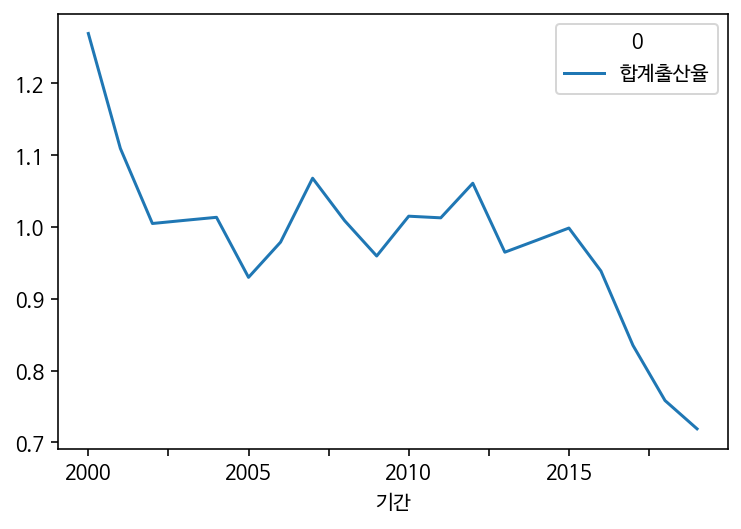

In [ ]:
summary1.plot()

In [ ]:
lowest = df.query('기간=="2019"')

In [ ]:
lowest = lowest.sort_values('합계출산율')

In [ ]:
lowest.head()

,기간,자치구,합계출산율,15-19세,20-24세,25-29세,30-34세,35-39세,40-44세,45-49세
519,2019,관악구,0.536,0.9,2.9,11.2,45.7,38.7,6.4,0.2
521,2019,강남구,0.612,1.0,2.3,12.8,59.7,38.9,6.9,NaN
507,2019,강북구,0.617,0.4,5.5,19.4,55.4,34.6,6.2,0.3
499,2019,종로구,0.648,0.6,1.6,15.2,53.3,48.3,8.6,0.3
503,2019,광진구,0.652,0.5,2.4,15.8,59.9,44.1,6.7,0.3


In [ ]:
lowest_region = lowest.query('자치구=="관악구"')

In [ ]:
lowest_region.head()

,기간,자치구,합계출산율,15-19세,20-24세,25-29세,30-34세,35-39세,40-44세,45-49세
519,2019,관악구,0.536,0.9,2.9,11.2,45.7,38.7,6.4,0.2


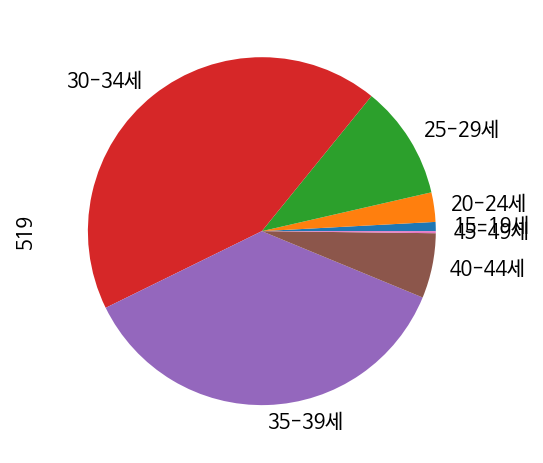

In [ ]:
lowest_region.iloc[0,3:].plot.pie()

2. 기업 이익 관련 모델링

* 데이터 파일은 미국의 기업 일부의 R&D 비용, 운영비용, 마케팅비용, 그리고 이익을 나타낸 데이터입니다. 

In [ ]:
raw = pd.read_csv('/content/drive/My Drive/Python_202002/dataset2.csv')

In [ ]:
raw

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
raw.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


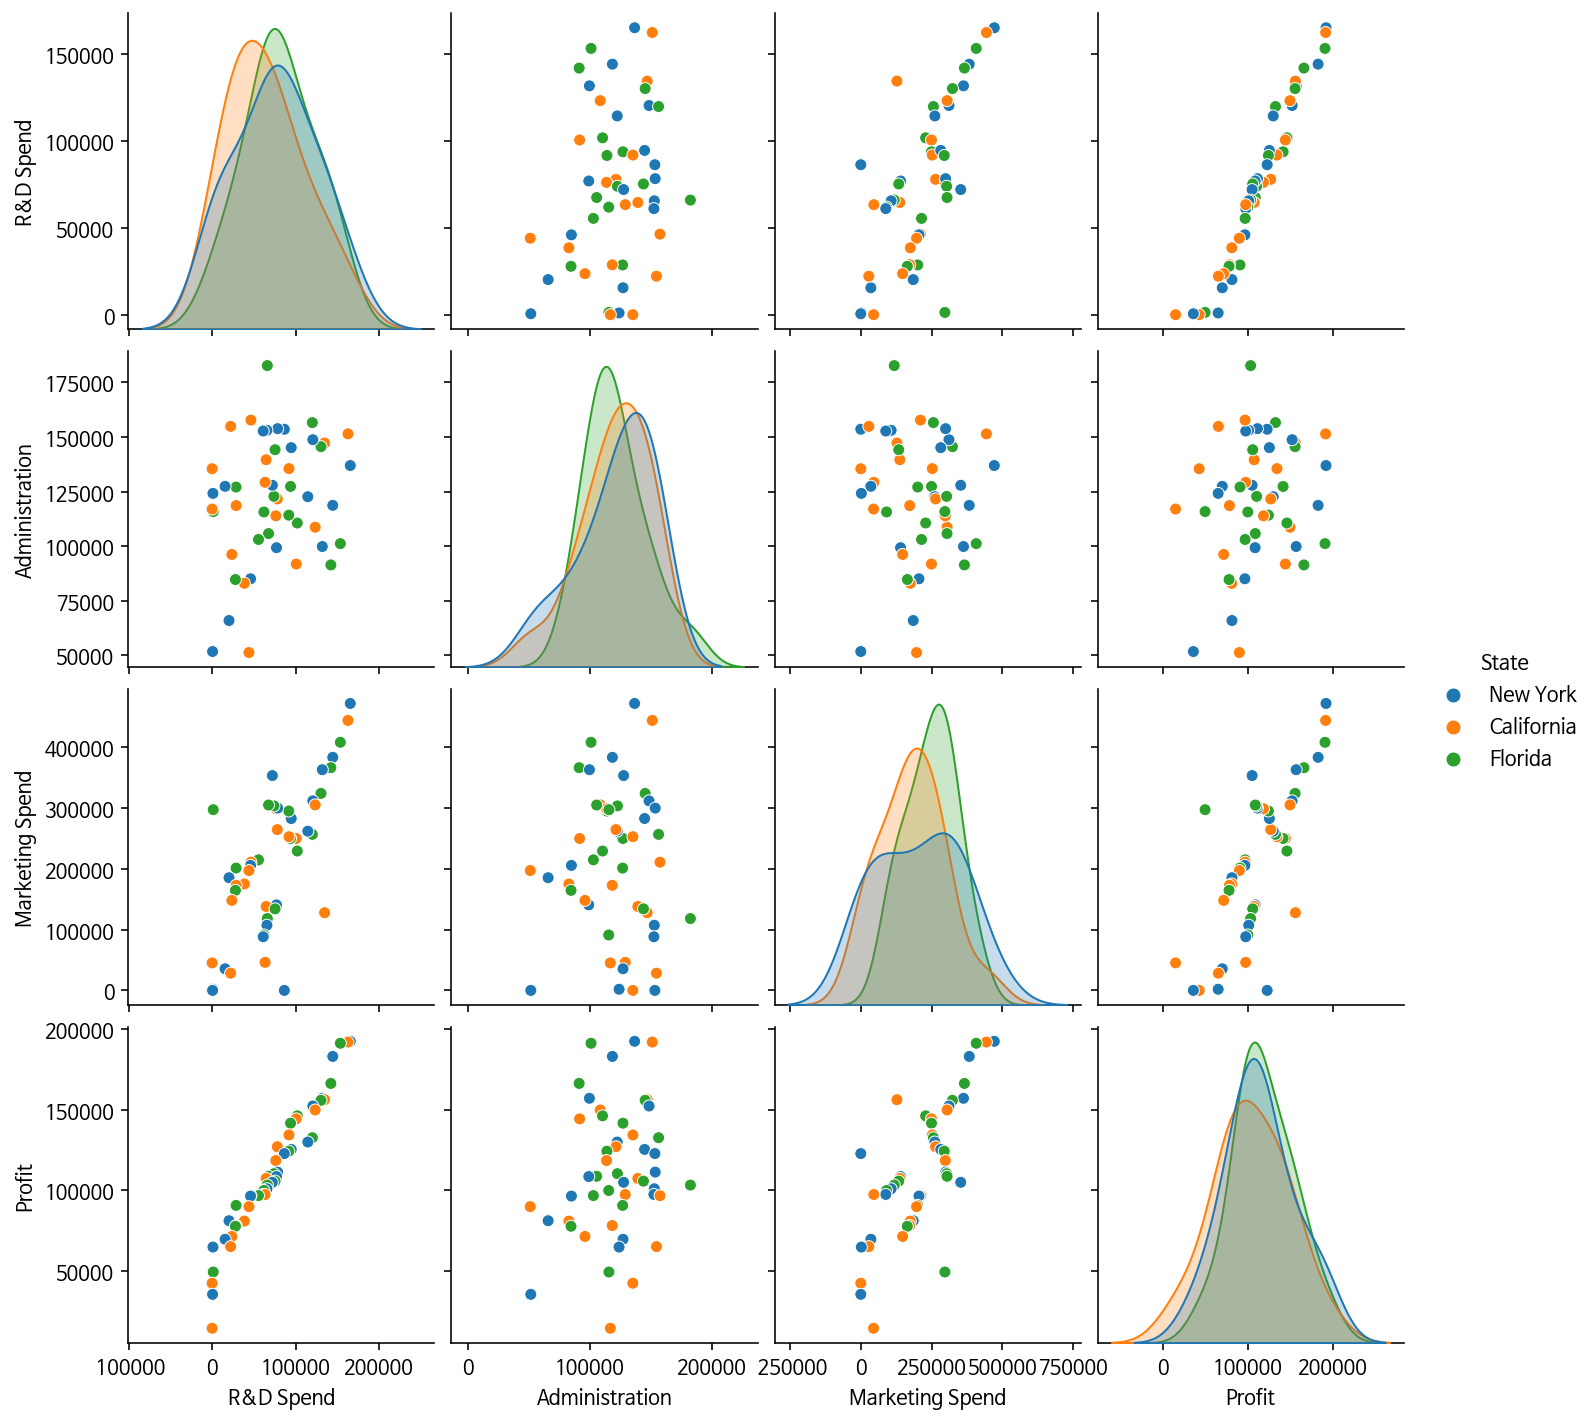

In [ ]:
import seaborn as sns
sns.pairplot(raw, hue='State')

In [ ]:
df = raw.rename(columns = {'R&D Spend':'연구비용', 'Administration':'관리비용', 'Marketing Spend':'마케팅비용', 'Profit': '이익'})

In [ ]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='이익 ~ 연구비용 + 관리비용 + 마케팅비용', data=df).fit()  #y=a + b1*x1을 y~x1 식으로 적으면 됨
lm.summary() # 기본적인 통계치 출력

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     이익   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           4.53e-30
Time:                        02:18:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
연구비용           0.8057      0.045     17.846      0.000       0.715       0.897
관리비용          -0.0268      0.051     -0.526      0.602      -0.130       0.076
마케팅비용          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm.params

Intercept    50122.192990
연구비용             0.805715
관리비용            -0.026816
마케팅비용            0.027228
dtype: float64

In [ ]:
print('영업이익 = {} + {}*연구비용 + {}*관리비용 + {}*마케팅비용'.format(lm.params.Intercept, lm.params.연구비용,lm.params.관리비용,lm.params.마케팅비용))

영업이익 = 50122.19298986527 + 0.8057150499157439*연구비용 + -0.026815968394751*관리비용 + 0.027228064800818692*마케팅비용


문자--> 숫자 변환 추가 설명

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'name':['a','b','c'],
                   'a':['1','2','-'],
                   'b':['4','5','6'],
                   'c':['7','9','3']})

In [ ]:
df

,name,a,b,c
0,a,1,4,7
1,b,2,5,9
2,c,-,6,3


In [ ]:
# 한 컬럼 변경 시, 에러 발생 시 NaN 값으로 변경하는 옵션 coerce
df['a'] = pd.to_numeric(df['a'], errors = 'coerce')  

In [ ]:
df

,name,a,b,c
0,a,1.0,4,7
1,b,2.0,5,9
2,c,NaN,6,3


In [ ]:
df.dtypes

name     object
a       float64
b        object
c        object
dtype: object

In [ ]:
# 여러 컬럼 바꾸려면 apply를 통해서 가능함
df[['a', 'b', 'c']] = df[['a','b', 'c']].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.dtypes

name     object
a       float64
b         int64
c         int64
dtype: object

In [ ]:
# 여기서 바꿀 컬럼명을 다른 변수로 저장하면
cols = ['a', 'b', 'c']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
### replace 사용 시
df = pd.DataFrame({'name':['a','b','c'],
                   'a':['1','2','-'],
                   'b':['4','5','6'],
                   'c':['7','9','3']})

### 한 컬럼 변경 시
# 0으로 바꿔도 문제 없는 상황인지는 데이터에 따라 판단 필요
df['a'] = df['a'].str.replace('-','0')  
df['a'] = df['a'].astype('float')

# 여러컬럼 변경 시
cols = ['b', 'c']
df[cols] = df[cols].apply(lambda col: col.str.replace('-', '0').astype('float'))

In [ ]:
df.dtypes

name     object
a       float64
b       float64
c       float64
dtype: object

In [ ]:
df = pd.DataFrame({'name':['a','b','c'],
                   'a':['1','2','-'],
                   'b':['4','5','6'],
                   'c':['7','9','3']})

# 여러컬럼 변경 시(함수 사용)
def to_float(col):
    col = col.str.replace('-', '0')
    return col.astype('float')
cols = ['a', 'b', 'c']
df[cols] = df[cols].apply(to_float)


In [ ]:

# 여러 컬럼 변경 시
# '-' 같은게 없을 때 사용
df[cols] = df[cols].astype({'a':'float',  'c':'float'})